In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# **RESEARCH QUESTIONS**
# HOW MANY RAPE ARRESTS WERE MADE IN QUEENS BOROUGH BASED ON RACE AND AGE GROUP? 
My goal for the this project is to find out how many rape cases were prevalent in Queens Borough. I am a female who lives in Queens and commutes to Manhattan for work in daily basis. I have to leave for work pretty early around 4:30 am twice a week. Sometimes I am concerned for my safetly as I have walk to the subway alone for 15 mins with visibly nobody around. Therefore, I am doing this data analysis to see how many arrests were made on rape cases in Queens based on race and age group.

In [171]:
df = pd.read_csv("/content/drive/MyDrive/NYPD_Arrest_Data__Year_to_Date_ (2).csv")

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [174]:
df.describe

<bound method NDFrame.describe of         ARREST_KEY  ...                       New Georeferenced Column
0        234233843  ...   POINT (-73.90973778899996 40.82618898100003)
1        234129823  ...   POINT (-73.93022154099998 40.67458330800008)
2        234040747  ...   POINT (-73.76598558899997 40.60344094100003)
3        234047720  ...   POINT (-73.91945797099999 40.83778161800007)
4        234042526  ...   POINT (-73.91627635999998 40.83598980000005)
...            ...  ...                                            ...
115294   222689440  ...   POINT (-73.83112953899997 40.69843969400005)
115295   222626401  ...   POINT (-73.84390995399998 40.85580274300003)
115296   222477062  ...  POINT (-73.90311219699998 40.870041281000056)
115297   222728174  ...   POINT (-73.91536344699995 40.76956124200007)
115298   222535613  ...   POINT (-73.94305278599995 40.64412879400004)

[115299 rows x 19 columns]>

In [175]:
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [176]:
df.notnull

<bound method DataFrame.notnull of         ARREST_KEY  ...                       New Georeferenced Column
0        234233843  ...   POINT (-73.90973778899996 40.82618898100003)
1        234129823  ...   POINT (-73.93022154099998 40.67458330800008)
2        234040747  ...   POINT (-73.76598558899997 40.60344094100003)
3        234047720  ...   POINT (-73.91945797099999 40.83778161800007)
4        234042526  ...   POINT (-73.91627635999998 40.83598980000005)
...            ...  ...                                            ...
115294   222689440  ...   POINT (-73.83112953899997 40.69843969400005)
115295   222626401  ...   POINT (-73.84390995399998 40.85580274300003)
115296   222477062  ...  POINT (-73.90311219699998 40.870041281000056)
115297   222728174  ...   POINT (-73.91536344699995 40.76956124200007)
115298   222535613  ...   POINT (-73.94305278599995 40.64412879400004)

[115299 rows x 19 columns]>

In [177]:
df.tail

<bound method NDFrame.tail of         ARREST_KEY  ...                       New Georeferenced Column
0        234233843  ...   POINT (-73.90973778899996 40.82618898100003)
1        234129823  ...   POINT (-73.93022154099998 40.67458330800008)
2        234040747  ...   POINT (-73.76598558899997 40.60344094100003)
3        234047720  ...   POINT (-73.91945797099999 40.83778161800007)
4        234042526  ...   POINT (-73.91627635999998 40.83598980000005)
...            ...  ...                                            ...
115294   222689440  ...   POINT (-73.83112953899997 40.69843969400005)
115295   222626401  ...   POINT (-73.84390995399998 40.85580274300003)
115296   222477062  ...  POINT (-73.90311219699998 40.870041281000056)
115297   222728174  ...   POINT (-73.91536344699995 40.76956124200007)
115298   222535613  ...   POINT (-73.94305278599995 40.64412879400004)

[115299 rows x 19 columns]>

In [178]:
df.shape


(115299, 19)

In [179]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115299 entries, 0 to 115298
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                115299 non-null  int64  
 1   ARREST_DATE               115299 non-null  object 
 2   PD_CD                     115278 non-null  float64
 3   PD_DESC                   115238 non-null  object 
 4   KY_CD                     115238 non-null  float64
 5   OFNS_DESC                 115238 non-null  object 
 6   LAW_CODE                  115299 non-null  object 
 7   LAW_CAT_CD                114221 non-null  object 
 8   ARREST_BORO               115299 non-null  object 
 9   ARREST_PRECINCT           115299 non-null  int64  
 10  JURISDICTION_CODE         115299 non-null  int64  
 11  AGE_GROUP                 115299 non-null  object 
 12  PERP_SEX                  115299 non-null  object 
 13  PERP_RACE                 115299 non-null  o

**Racial groups and the arrest numbers**

This illustrates the number of arrests made based on the race. 

In [180]:
df['PERP_RACE'].value_counts()

BLACK                             57011
WHITE HISPANIC                    28355
WHITE                             12586
BLACK HISPANIC                    10208
ASIAN / PACIFIC ISLANDER           6389
UNKNOWN                             431
AMERICAN INDIAN/ALASKAN NATIVE      319
Name: PERP_RACE, dtype: int64

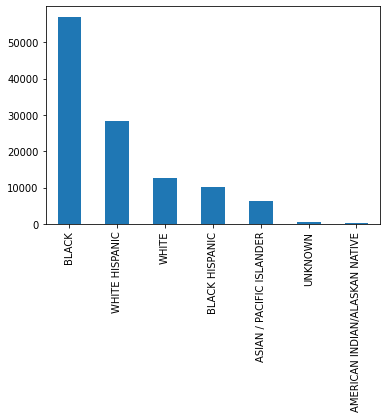

In [212]:
df["PERP_RACE"].value_counts().plot.bar()

**AGE GROUP**

*Based on this result, most the perpetrators belong to the age of 25 -  44. It looks like the criminal activity grows with age and reaches its peak in youth (i.e. 25-44) and dwindles as they become senile or old.*

In [181]:
df['AGE_GROUP'].value_counts()

25-44    65846
45-64    22438
18-24    21931
<18       3408
65+       1676
Name: AGE_GROUP, dtype: int64

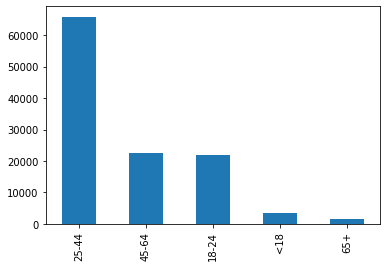

In [182]:
df["AGE_GROUP"].value_counts().plot.bar()

In [185]:
df['OFNS_DESC'].value_counts()

ASSAULT 3 & RELATED OFFENSES       19937
FELONY ASSAULT                     11472
PETIT LARCENY                       9132
DANGEROUS DRUGS                     8163
MISCELLANEOUS PENAL LAW             7629
                                   ...  
PARKING OFFENSES                       2
FELONY SEX CRIMES                      2
ADMINISTRATIVE CODES                   2
NEW YORK CITY HEALTH CODE              1
KIDNAPPING AND RELATED OFFENSES        1
Name: OFNS_DESC, Length: 63, dtype: int64

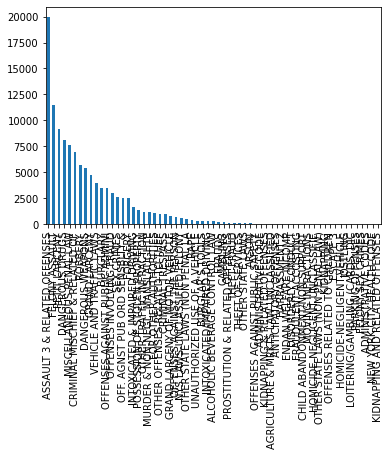

In [186]:
df['OFNS_DESC'].value_counts().plot.bar()

GENDER OF THE OFFENDERS BASED ON NEW YORK CITY 

Based on the data provided by NYPD, male offenders exceed female by whopping number of 66%. Therefore, we can deduce that male are likely to commit more offense and get arrested than female demographics.

In [217]:
M = 95849
F = 19450
total = M+F
diff = M-F
print (total)
print (diff)
perc =  76399/115299
print (perc)

115299
76399
0.6626163279820293


In [187]:
df['PERP_SEX'].value_counts()

M    95849
F    19450
Name: PERP_SEX, dtype: int64

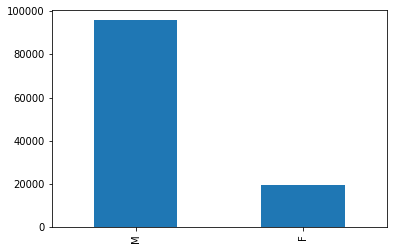

In [188]:
df['PERP_SEX'].value_counts().plot.bar()

# ***ARREST BASED ON BOROUGHS***

The graphs shows that the borught with the highest crime rate is Brooklyn followed by Manhattan, Bronx, Queens, and Staten Island. Based on this analysis, I can safely deduce that I live in the second safest borough in New York city. This will make me think twice before I move to Brooklyn or Manhattan.

In [189]:
df['ARREST_BORO'].value_counts()

K    31004
M    28948
B    25312
Q    24654
S     5381
Name: ARREST_BORO, dtype: int64

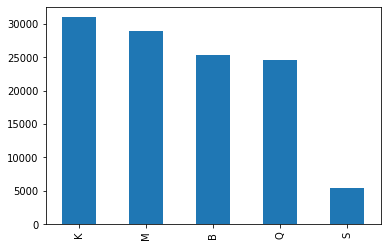

In [190]:
df['ARREST_BORO'].value_counts().plot.bar()

# ***PIE CHART BASED ON BOROUGHS ***

I wanted to build a pie chart based on the chart above that show the arrests based on boroughs. I could not find an easy code. So, I painstakingly had to assign name to variables, calculate it's percentage, and put in the numbers in the code. It is a very tedious method, I hope to learn and easy method to do the same function in less time.

In [191]:
K = 31004
M = 28948
B = 25312
Q = 24654
S =  5381
Total = (K + M + B+ Q + S)
print (Total)
KP = (31004/115299*100)
print (KP)
MP = (28948/115299*100)
BP = (25312/115299*100)
QP = (24654/115299*100)
SP = (5381/115299*100)
print (MP)
print (BP)
print (QP)
print (SP)

115299
26.890085776979856
25.106895983486417
21.953356056860855
21.382665938126088
4.666996244546787


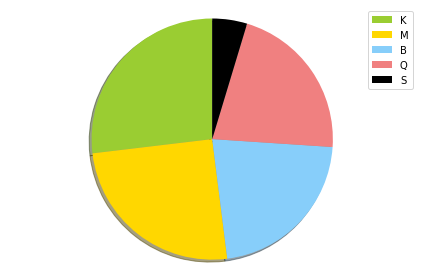

In [192]:
labels = ['K', 'M', 'B', 'Q', 'S']
sizes = [26.890085776979856, 25.106895983486417, 21.953356056860855, 21.382665938126088, 4.666996244546787]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "Black"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
explode = (0.1, 0, 0, 0)  # explode 1st slic
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

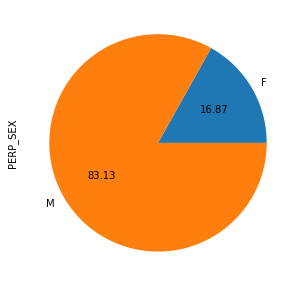

In [193]:
df.groupby('PERP_SEX')['PERP_SEX'].count().plot.pie(autopct='%.2f',figsize=(5,5))

# ***RAPE CASES***


I WANTED TO SEE THE DATA VISUALIZATION OF ALL THE OFFENSES. THEREFORE, I HAD TO INCREASE THE SIZE TO SEE ALL THE NUMBERS AND VALUES. I CAN SEE FROM THE PIE CHART THAT THE OVERALL RATE OF RAPE WAS 0.40% WHICH MAY SEEM INSIGNIFICANT BUT IS STILL ALARMING.

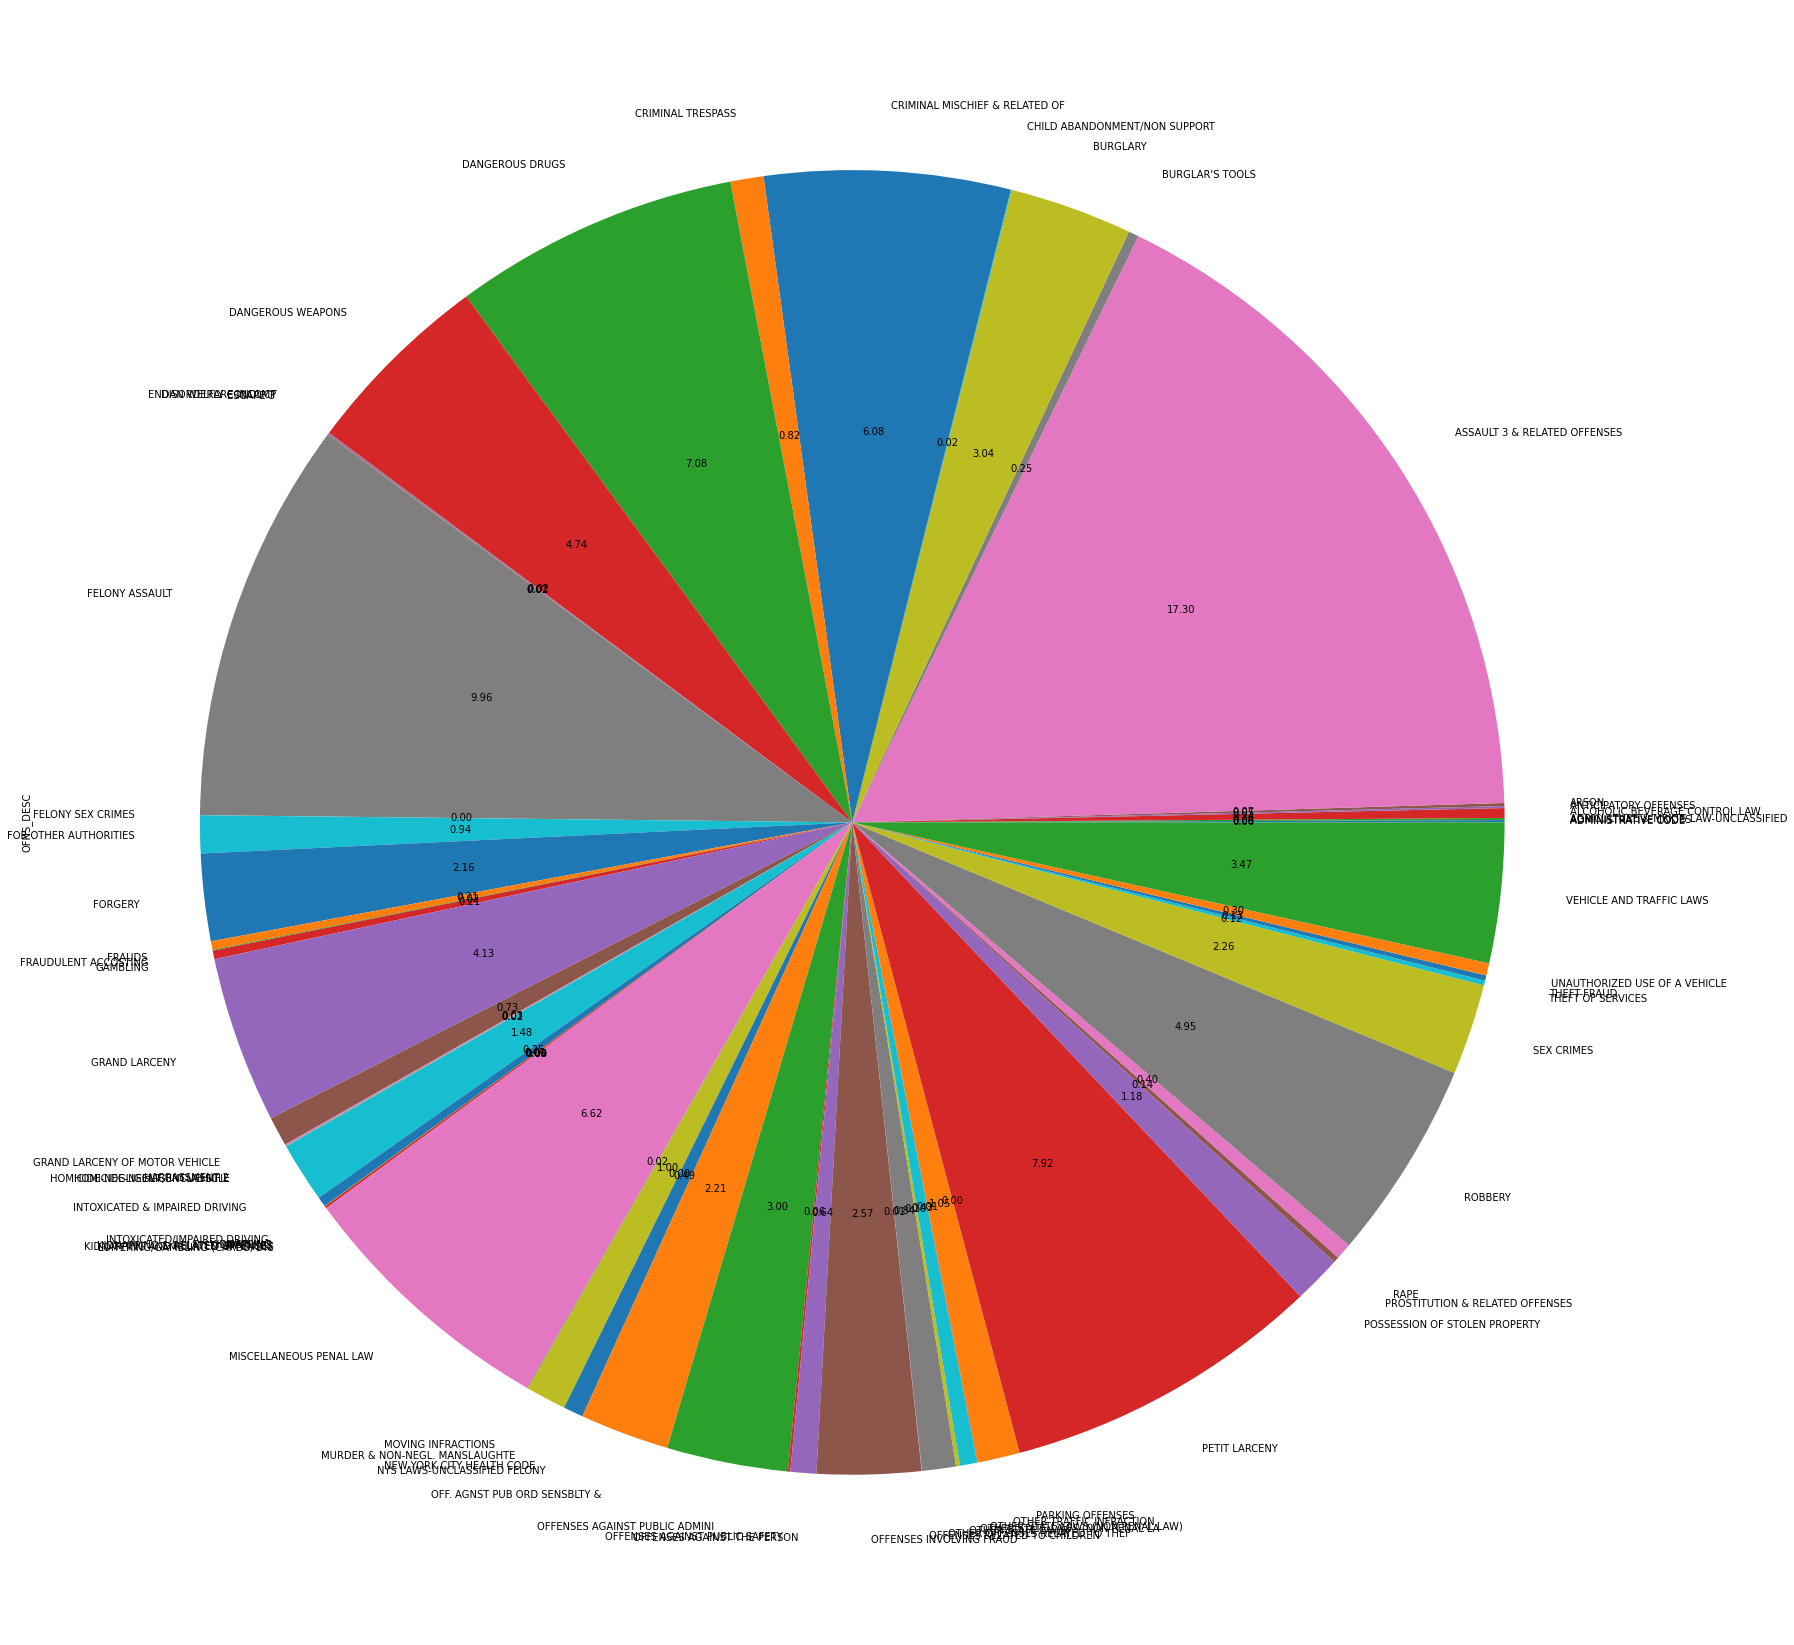

In [194]:
df.groupby('OFNS_DESC')['OFNS_DESC'].count().plot.pie(autopct='%.2f',figsize=(30,30))

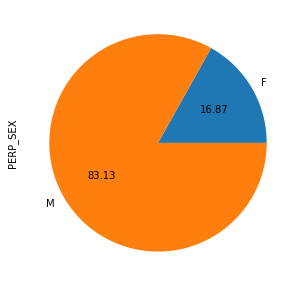

In [195]:
df.groupby('PERP_SEX')['PERP_SEX'].count().plot.pie(autopct='%.2f',figsize=(5,5))

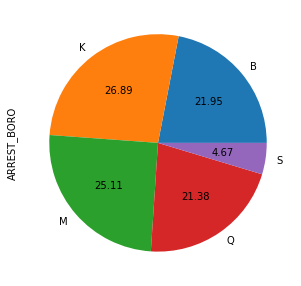

In [196]:
df.groupby('ARREST_BORO')['ARREST_BORO'].count().plot.pie(autopct='%.2f',figsize=(5,5))



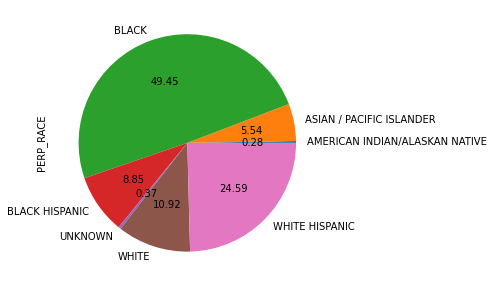

In [197]:
df.groupby('PERP_RACE')['PERP_RACE'].count().plot.pie(autopct='%.2f',figsize=(5,5))

#** DROPPING THE UNWANTED COLUMNS**

In [198]:
df1 = df.drop(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'KY_CD','LAW_CODE', 'LAW_CAT_CD', 'ARREST_PRECINCT','JURISDICTION_CODE', 'X_COORD_CD','Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'], axis=1, inplace=True)

In [199]:
df.sort_values(by=["ARREST_BORO", "PERP_RACE", "PERP_SEX", "AGE_GROUP", "PD_DESC", "OFNS_DESC"], ascending=False)

,PD_DESC,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
63507,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,S,<18,M,WHITE HISPANIC
86461,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,S,<18,M,WHITE HISPANIC
106968,WEAPONS POSSESSION 1 & 2,DANGEROUS WEAPONS,S,<18,M,WHITE HISPANIC
8260,"STOLEN PROPERTY 3,POSSESSION",POSSESSION OF STOLEN PROPERTY,S,<18,M,WHITE HISPANIC
4426,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,S,<18,M,WHITE HISPANIC
...,...,...,...,...,...,...
15648,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,B,25-44,F,AMERICAN INDIAN/ALASKAN NATIVE
75493,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,B,25-44,F,AMERICAN INDIAN/ALASKAN NATIVE
4414,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,B,25-44,F,AMERICAN INDIAN/ALASKAN NATIVE
107573,CRIMINAL MIS 2 & 3,CRIMINAL MISCHIEF & RELATED OF,B,18-24,F,AMERICAN INDIAN/ALASKAN NATIVE


# **SETTING CONDITIONS TO SELECT ONLY RAPE VALUE FROM THE OFFENSE COLUMN**

*THERE ARE TOTAL NUMBER OF 459 RAPE CASES IN FIVE BOROUGHS.*

In [200]:
Rape = df[df["OFNS_DESC"] == "RAPE"]
print (Rape)

       PD_DESC OFNS_DESC  ... PERP_SEX                       PERP_RACE
1       RAPE 1      RAPE  ...        M                           BLACK
10      RAPE 1      RAPE  ...        M                           BLACK
15      RAPE 1      RAPE  ...        M                  WHITE HISPANIC
16      RAPE 3      RAPE  ...        M                           BLACK
18      RAPE 1      RAPE  ...        M                           BLACK
...        ...       ...  ...      ...                             ...
114076  RAPE 3      RAPE  ...        M  AMERICAN INDIAN/ALASKAN NATIVE
114307  RAPE 1      RAPE  ...        M                  WHITE HISPANIC
114645  RAPE 3      RAPE  ...        M                           BLACK
114739  RAPE 1      RAPE  ...        M                  WHITE HISPANIC
114896  RAPE 3      RAPE  ...        M                  WHITE HISPANIC

[459 rows x 6 columns]


In [201]:
df[df["OFNS_DESC"] == "RAPE"].count()

PD_DESC        459
OFNS_DESC      459
ARREST_BORO    459
AGE_GROUP      459
PERP_SEX       459
PERP_RACE      459
dtype: int64

# ***RAPE CASES IN QUEENS***

Since my research question deals with rape cases in Queens borough. I was able to find out that there are total ***107*** arrests made in Queens for rape.
Also, I was  able to convert the dataframe to an interactive table using the magic wand icon below. It allowed me enter value in filter boxes and get the desired results.

In [202]:
 df.loc[(df["ARREST_BORO"] == "Q") & (df["OFNS_DESC"] == "RAPE")]

,PD_DESC,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
10,RAPE 1,RAPE,Q,25-44,M,BLACK
37,RAPE 1,RAPE,Q,25-44,M,WHITE HISPANIC
40,RAPE 1,RAPE,Q,45-64,M,BLACK
51,RAPE 2,RAPE,Q,18-24,M,WHITE HISPANIC
55,RAPE 3,RAPE,Q,45-64,M,WHITE HISPANIC
...,...,...,...,...,...,...
108845,RAPE 3,RAPE,Q,25-44,M,WHITE HISPANIC
111370,RAPE 3,RAPE,Q,18-24,M,WHITE HISPANIC
112543,RAPE 1,RAPE,Q,25-44,M,WHITE HISPANIC
112991,RAPE 3,RAPE,Q,18-24,M,WHITE HISPANIC


In [203]:
Queens_Rape_cases.tail()

,PD_DESC,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
108845,RAPE 3,RAPE,Q,25-44,M,WHITE HISPANIC
111370,RAPE 3,RAPE,Q,18-24,M,WHITE HISPANIC
112543,RAPE 1,RAPE,Q,25-44,M,WHITE HISPANIC
112991,RAPE 3,RAPE,Q,18-24,M,WHITE HISPANIC
114076,RAPE 3,RAPE,Q,25-44,M,AMERICAN INDIAN/ALASKAN NATIVE


In [204]:
Queens_Rape_cases.describe

<bound method NDFrame.describe of        PD_DESC OFNS_DESC  ... PERP_SEX                       PERP_RACE
10      RAPE 1      RAPE  ...        M                           BLACK
37      RAPE 1      RAPE  ...        M                  WHITE HISPANIC
40      RAPE 1      RAPE  ...        M                           BLACK
51      RAPE 2      RAPE  ...        M                  WHITE HISPANIC
55      RAPE 3      RAPE  ...        M                  WHITE HISPANIC
...        ...       ...  ...      ...                             ...
108845  RAPE 3      RAPE  ...        M                  WHITE HISPANIC
111370  RAPE 3      RAPE  ...        M                  WHITE HISPANIC
112543  RAPE 1      RAPE  ...        M                  WHITE HISPANIC
112991  RAPE 3      RAPE  ...        M                  WHITE HISPANIC
114076  RAPE 3      RAPE  ...        M  AMERICAN INDIAN/ALASKAN NATIVE

[107 rows x 6 columns]>

# ***I was able to produce these numbers using the interactive table function in Google Collab.***

In [205]:

Asian = 18
Black = 34
White_BLack_Hispanic = 52
White = 2
American_Indian = 1
TotalQ_rape_cases = (Asian + Black + White_BLack_Hispanic + White + American_Indian)
print (TotalQ_rape_cases)



107


The highest number of rape arrests made, based on the race, is White/Black Hispanic. The perpetrators ranges from all racial backgrounds from white to asian and American Indians/Alaskans. I think it is also based on the demographics that lives in Queens. Since Queens is mostly inhabitated by minorities, the result is obviously going to point towards densely populated racial groups.






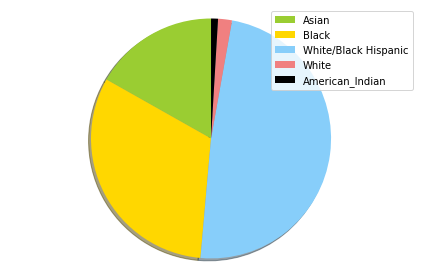

In [206]:
labels = ['Asian', 'Black', 'White/Black Hispanic', 'White', "American_Indian"]
sizes = [18, 34, 52, 2, 1]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "Black"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
explode = (0.1, 0, 0, 0)  # explode 1st slic
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

<18 =  1
18_24 = 16
25_44 = 67
45_64 = 20
60+= 3

# ***Age group***

Based on the analysis, the ages between 25-44 were the highest number of perpetrators.

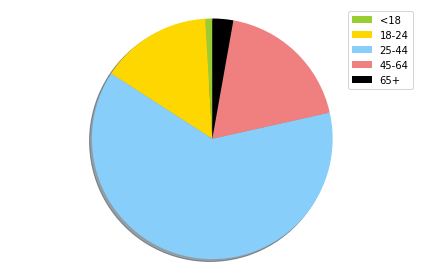

In [211]:
labels = ['<18', '18-24', '25-44', '45-64', "65+"]
sizes = [1, 16, 67, 20, 3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', "Black"]
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
explode = (0.1, 0, 0, 0)  # explode 1st slic
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()



In [220]:
Queens = (107/459)*100
print (Queens)

23.311546840958606


# ***Conclusion***

As the conclusion, out of 459 cases of rape across the five borughs, 107 cases were reported in Queens. Even though, Queens comes second to last in overall offenses, but, in the case of rape, the number is very high which is 23.31 out of all five boroughs. Queens amounts to almost quarter of overall rape cases which is worrisome. This will definitely make me aware of vulneribily women face in Queens. Consequently, women in Queens have to take proper measures to protect themselves in case of such heinous attack.